<a href="https://colab.research.google.com/github/imusicmash/stanford_llm_python/blob/main/StanfordLLMClassWeek7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openai
!pip install wget

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.5/257.5 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=fb730fb56ab295d8c48aafc40b56308fc51b1bbecd9daf8bded978fa985ec558
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
import os
from google.colab import userdata
import openai
os.environ["OPENAI_API_KEY"] = userdata.get('open_ai_key')

# Image as an input

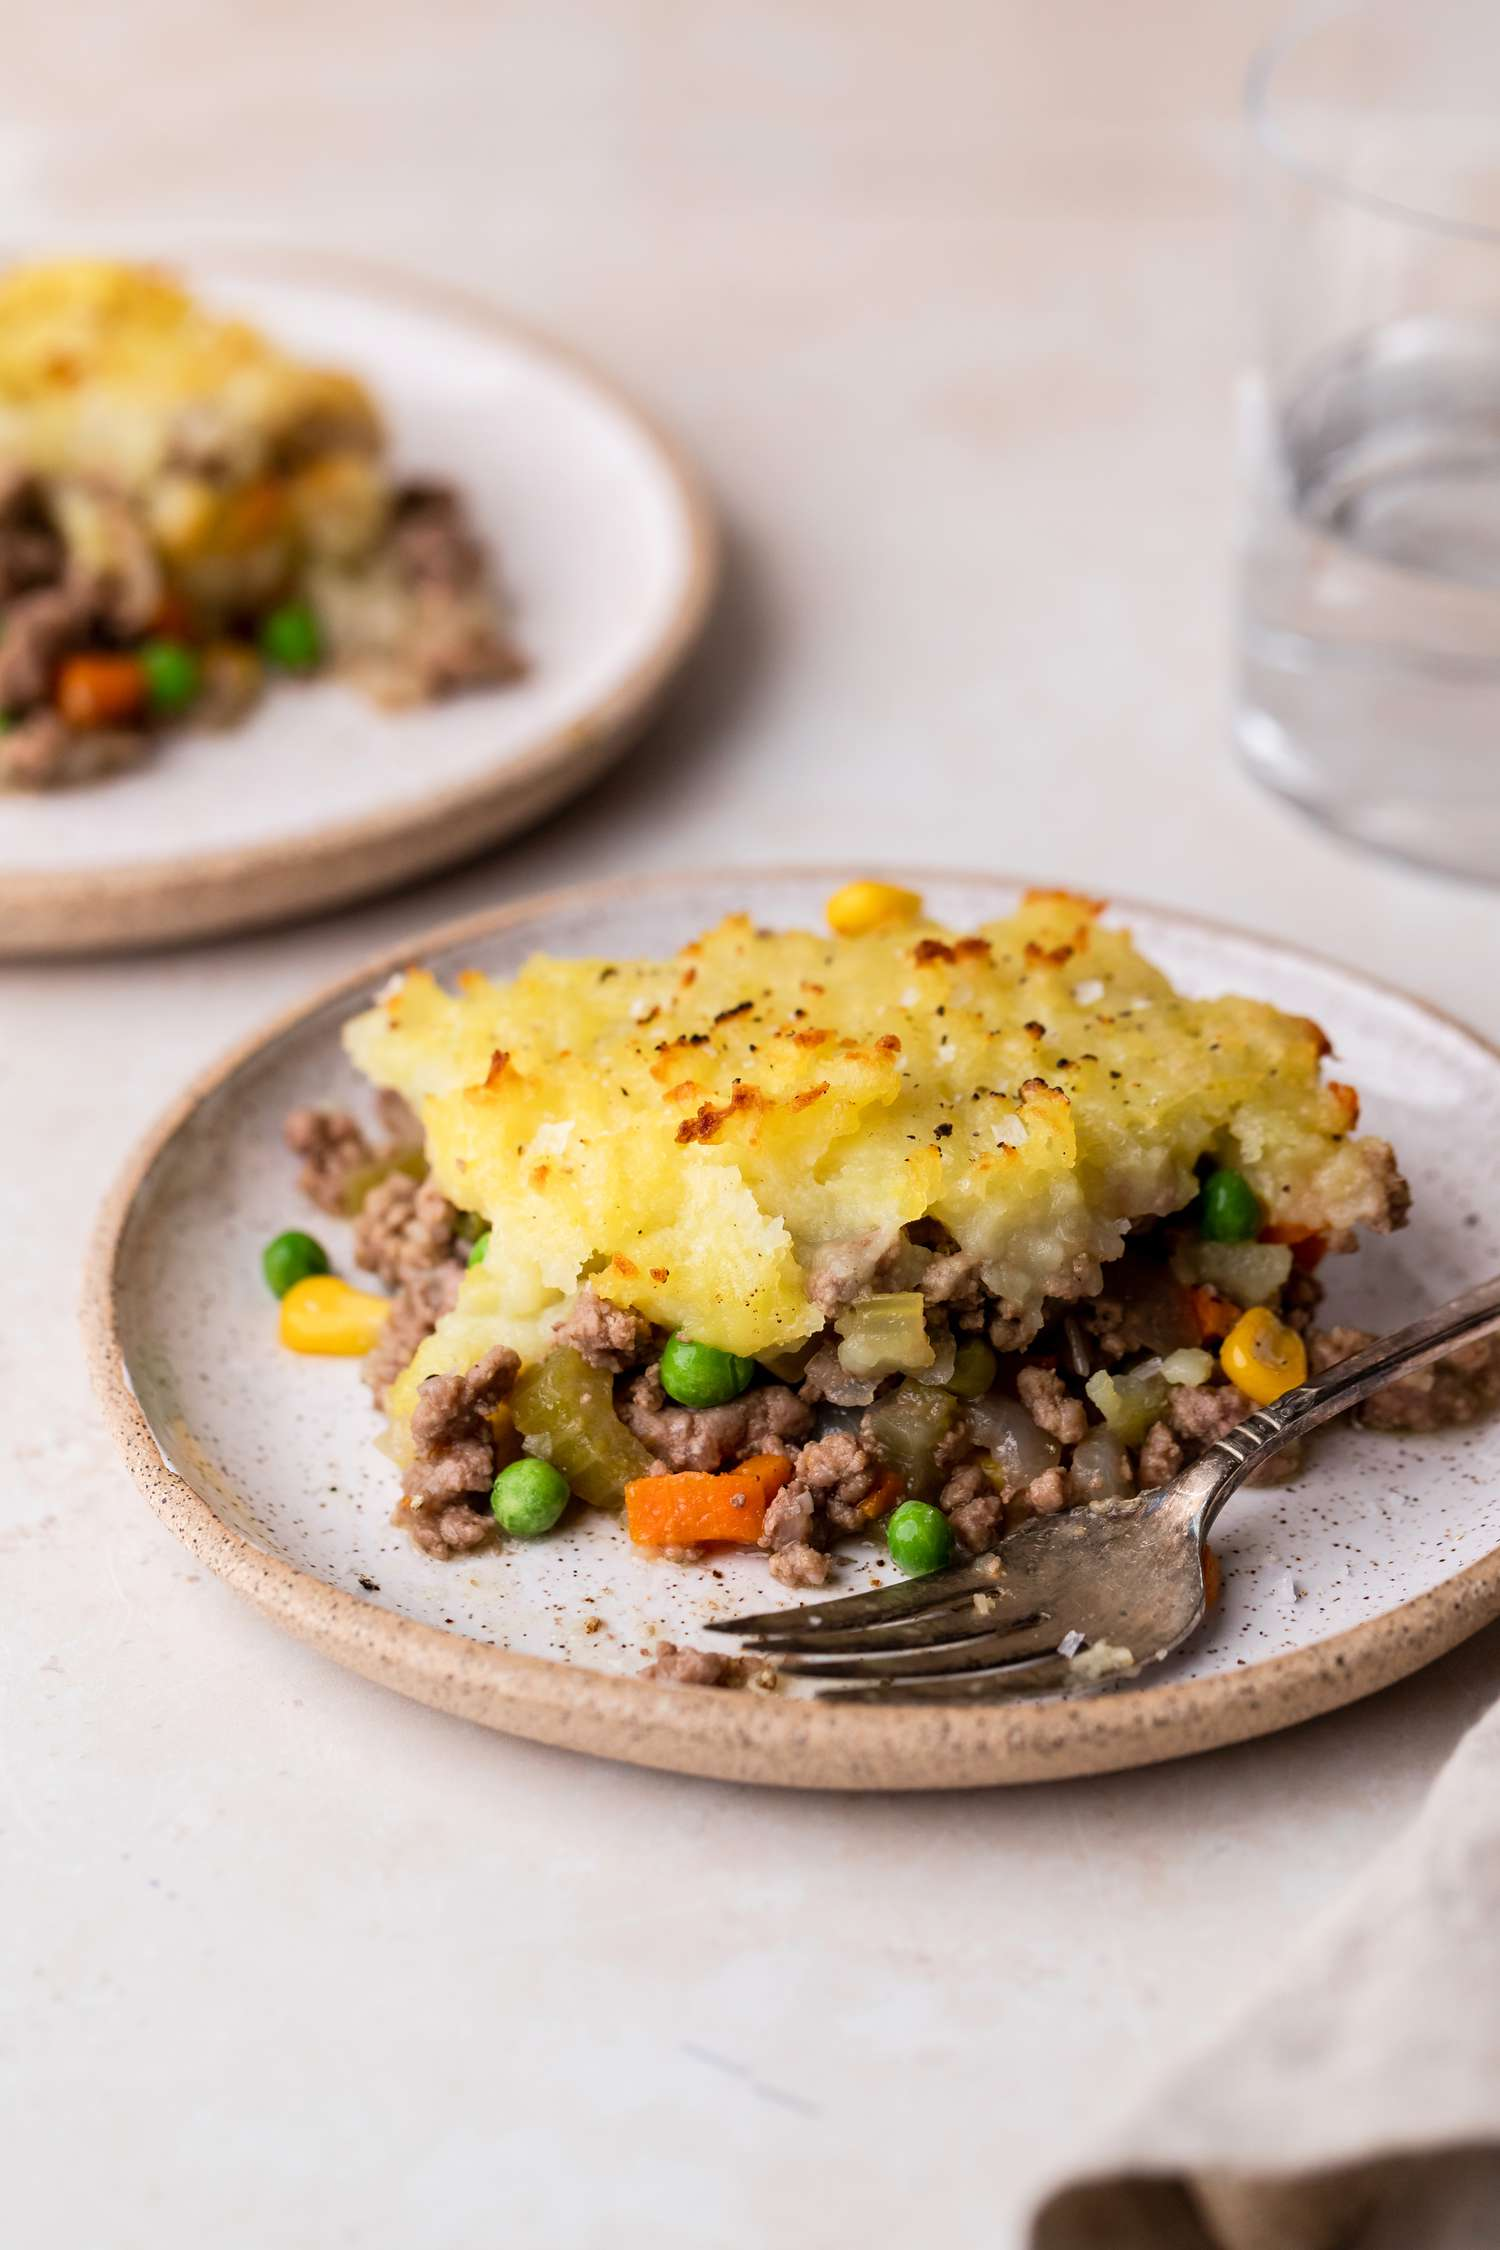

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import wget

image_url = "https://www.simplyrecipes.com/thmb/fQGMTDOkMsE_phwCz445MnDMWis=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/Simply-Recipes-Easy-Shepherds-Pie-Lead-1-165895d900e64d9d867b4027298ad25a.jpg"
image_path = wget.download(image_url)

img = cv2.imread(image_path)
cv2_imshow(img)

In [ ]:
from openai import OpenAI

client = OpenAI()

response = client.chat.completions.create(
    model="gpt-4-vision-preview",
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "text", "text": "Identify all food items in this image. How do I make it?"},
                {
                    "type": "image_url",
                    "image_url": image_url,
                },
            ],
        },
    ],
    max_tokens=300,
)

In [ ]:
out = response.choices[0].message.content
print(out)

This image shows a dish that appears to be shepherd's pie, which is a classic comfort food typically made with ground meat and vegetables, topped with a layer of mashed potatoes that's been browned in the oven.

To make shepherd's pie, you would need the following basic ingredients and steps:

Ingredients:
- Ground meat (traditionally lamb, but beef is often used for cottage pie)
- Onions
- Carrots
- Peas
- Corn (optional, seen in the image)
- Beef or chicken stock
- Mashed potatoes (potatoes, milk, butter, seasoning)
- Salt, pepper, and other seasonings to taste
- Optional: garlic, Worcestershire sauce, tomato paste, and herbs (like rosemary or thyme)

Basic Steps:
1. Preheat your oven to a medium-high temperature (around 200°C or 400°F).

2. Prepare your mashed potatoes: Boil peeled and chopped potatoes until tender, then mash with milk, butter, salt, and pepper until smooth.

3. Cook the ground meat in a pan until browned, breaking it into small pieces as it cooks.

4. Add chopped o

In [ ]:
from openai import OpenAI

client = OpenAI()

response = client.chat.completions.create(
    model="gpt-4-vision-preview",
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "text", "text": "What’s in this image?"},
                {
                    "type": "image_url",
                    "image_url": image_url,
                },
            ],
        },
        {"role": "assistant", "content": out},
        {"role": "user", "content": "Make two ingredient options, one regular and one low calorie and approximate the calorie counts"}
    ],
    max_tokens=300,
)

In [ ]:
out = response.choices[0].message.content
print(out)

Certainly! Here are two versions of the ingredient options for shepherd's pie, one with regular ingredients and another with lower-calorie alternatives. Please note that the calorie counts are approximate and can vary based on specific brands and portion sizes.

**Regular Shepherd's Pie:**

Ingredients:
- Ground lamb or beef: 1 lb (approx. 1,300 calories for lamb, 800 for lean beef)
- Potatoes for mashing: 1.5 lbs (approx. 350 calories)
- Butter for mashing potatoes: 2 tablespoons (approx. 200 calories)
- Whole milk for mashing potatoes: 1/2 cup (approx. 75 calories)
- Mixed vegetables (onions, carrots, peas, corn): 2 cups (approx. 150-200 calories)
- Beef stock: 1 cup (approx. 40 calories)
- Cheese topping (optional): 1/2 cup shredded cheddar (approx. 225 calories)
  
**Total Approximate Calories: Regular Version:**
- Without cheese: ~1,615 to 1,665 calories for the entire dish
- With cheese: ~1,840 to 1,890 calories for the entire dish

**Low-Calorie Shepherd's Pie:**

Ingredients:
-

# Image as an output

In [ ]:
!pip install wget
import wget

In [ ]:
response = client.images.generate(
  model="dall-e-3",
  prompt=f"generate the dishs in these instructions {out}",
  size="1024x1024",
  quality="standard",
  n=1,
)

image_url = response.data[0].url

In [ ]:
image = wget.download(image_url)

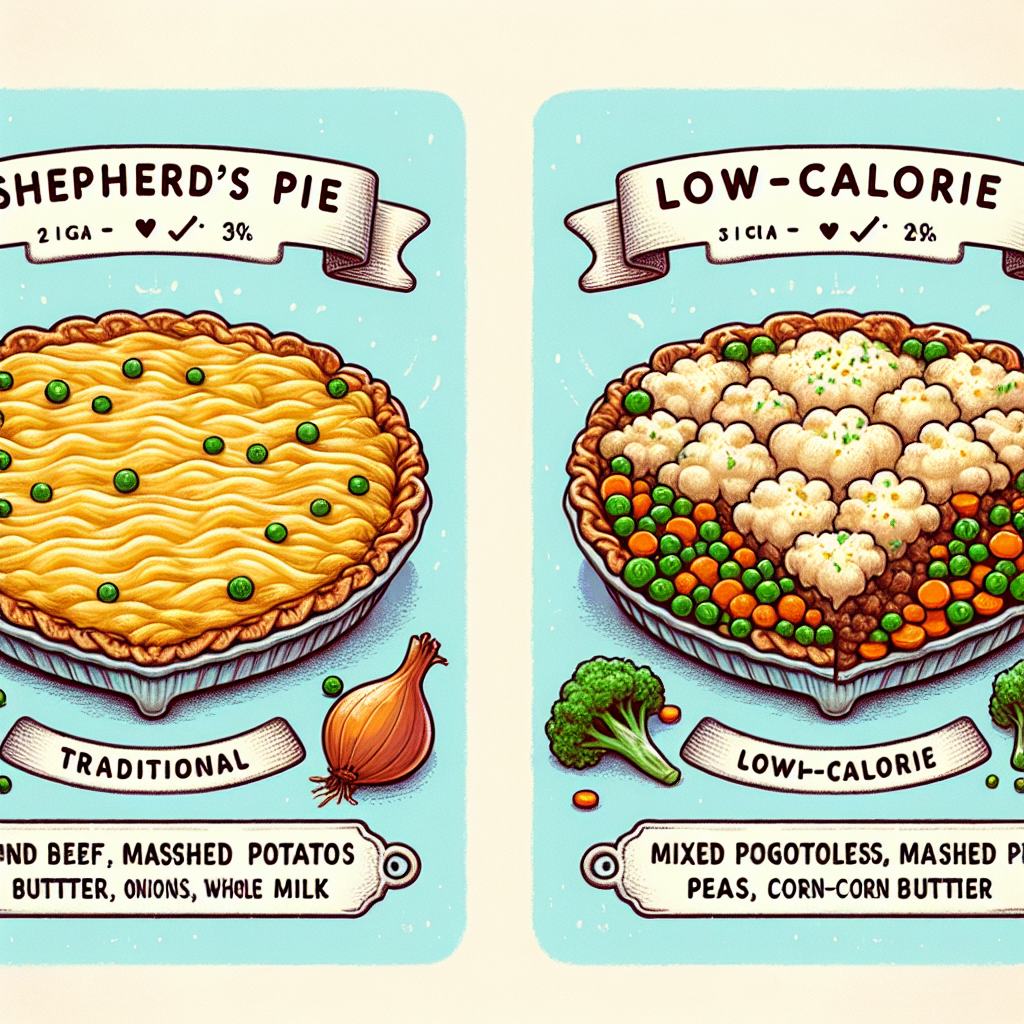

In [ ]:
img = cv2.imread(image)
cv2_imshow(img)

# Open source

In [ ]:
!pip install diffusers
!pip install accelerate

/usr/local/lib/python3.10/dist-packages/diffusers/configuration_utils.py:244: FutureWarning: It is deprecated to pass a pretrained model name or path to `from_config`.If you were trying to load a model, please use <class 'diffusers.models.unets.unet_2d_condition.UNet2DConditionModel'>.load_config(...) followed by <class 'diffusers.models.unets.unet_2d_condition.UNet2DConditionModel'>.from_config(...) instead. Otherwise, please make sure to pass a configuration dictionary instead. This functionality will be removed in v1.0.0.
  deprecate("config-passed-as-path", "1.0.0", deprecation_message, standard_warn=False)


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

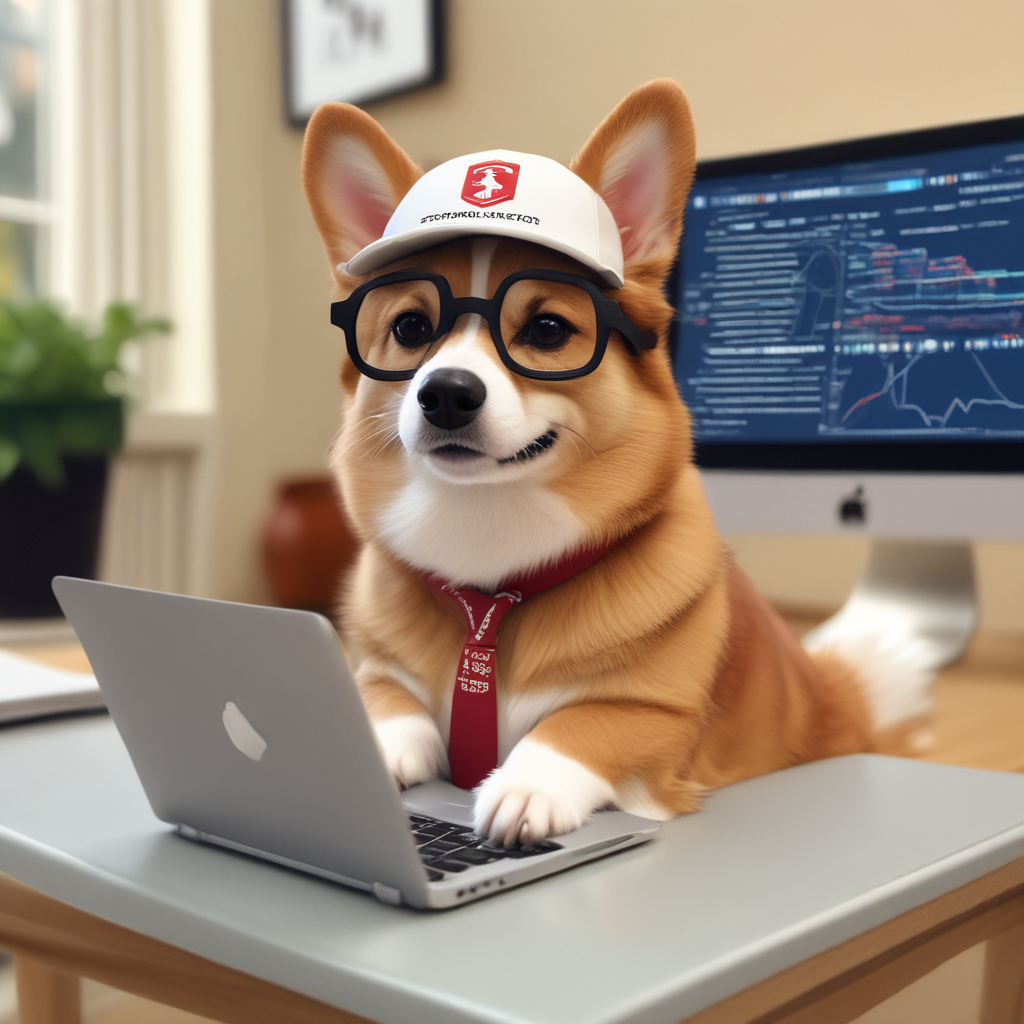

In [ ]:
import torch
from diffusers import StableDiffusionXLPipeline, UNet2DConditionModel, EulerDiscreteScheduler
from huggingface_hub import hf_hub_download
from safetensors.torch import load_file
import cv2
from google.colab.patches import cv2_imshow

base = "stabilityai/stable-diffusion-xl-base-1.0"
repo = "ByteDance/SDXL-Lightning"
ckpt = "sdxl_lightning_4step_unet.safetensors" # Use the correct ckpt for your step setting!

# Load model.
unet = UNet2DConditionModel.from_config(base, subfolder="unet").to("cuda", torch.float16)
unet.load_state_dict(load_file(hf_hub_download(repo, ckpt), device="cuda"))
pipe = StableDiffusionXLPipeline.from_pretrained(base, unet=unet, torch_dtype=torch.float16, variant="fp16").to("cuda")

# Ensure sampler uses "trailing" timesteps.
pipe.scheduler = EulerDiscreteScheduler.from_config(pipe.scheduler.config, timestep_spacing="trailing")

# Ensure using the same inference steps as the loaded model and CFG set to 0.
pipe("A cute cartoon corgi at Stanford coding on a laptop wearing a stanford hat", num_inference_steps=4, guidance_scale=0).images[0].save("cartoon_corgi.png")
img = cv2.imread("cartoon_corgi.png")
cv2_imshow(img)